# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

#### 1.1 Carregamento dos pacotes necessários 
Os pacotes necessários para esta tarefa são:
- Pandas para leitura e modificação dos dados;
- Numpy que permite operações matemáticas;
- Matplotlib.pyplot para a geração de gráficos;
- seaborn para visualização de gráficos estatísticos;
- Graphviz para visualizar as árvores de classificação criadas;
- Função train_test_split do pacote sklearn.model_selection para dividir a base de teste em validação e teste;
- Função DecisionTreeClassifier do sklearn.tree para a aplicação das árvores de classificação;
- Função export_graphviz para submeter os dados da árvore ao pacote graphviz;
- Funções confusion_matrix e ConfusionMatrixDisplay do pacote sklearn.metrics para ajuste e visualização da matriz de confusão do ajuste final da árvore de classificação.

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

#### 1.2 Carregamento das bases necessárias
As bases em questão são a X_train, que apresenta os dados para treino do ajuste de árvore de classificação; X_test, onde estão os dados de treino do ajuste; y_train, com a variável resposta na base de treino; y_test, com a variável resposta na base de teste. Todas as bases são lidas a partir dos arquivos csv salvos na atividade anterior.

In [68]:
# Lê o arquivo X_train.csv, tomando com índices as duas colunas definidas anteriormente ('index' e 'subject train')
X_train = pd.read_csv('./X_train.csv', index_col=['index', 'subject train'])

# Visualiza as 10 primeiras linhas do dataframe resultante
X_train.head(10)

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
index,subject train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
5,1,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
6,1,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
7,1,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,0.136382,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976
8,1,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.314038,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364


In [69]:
# Lê o arquivo X_test.csv, tomando com índices as duas colunas definidas anteriormente ('index' e 'subject test')
X_test = pd.read_csv('./X_test.csv', index_col=['index', 'subject test'])

# Visualiza as 10 primeiras linhas do dataframe resultante
X_test.head(10)

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
index,subject test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
5,2,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471
6,2,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,0.272339,-0.093855,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065
7,2,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,0.213799,-0.338123,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706
8,2,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,0.283428,-0.629599,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491


In [70]:
# Lê o arquivo y_train.csv, removendo a coluna extra de índice ('Unnamed: 0')
y_train = pd.read_csv('./y_train.csv', index_col=['Unnamed: 0'])

# Visualiza as 10 primeiras linhas do dataframe resultante
y_train.head(10)

,0
0,5
1,5
2,5
3,5
4,5
5,5
6,5
7,5
8,5
9,5


In [71]:
# Lê o arquivo y_test.csv, removendo a coluna extra de índice ('Unnamed: 0')
y_test = pd.read_csv('./y_test.csv', index_col=['Unnamed: 0'])

# Visualiza as 10 primeiras linhas do dataframe resultante
y_test.head(10)

,0
0,5
1,5
2,5
3,5
4,5
5,5
6,5
7,5
8,5
9,5


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Teste. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [72]:
# Separando a base de treino em treino e validação, com a última sendo 25% da base de treino original
X_treino, X_valid, y_treino, y_valid = train_test_split(X_train, y_train, test_size=.25,
                                                        random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

#### 3.1 Ajuste da árvore

In [73]:
# Ajusta uma árvore de classificação com profundidade máxima igual a 4 na base de treino
arvore_inicial = DecisionTreeClassifier(max_depth=4, random_state=200909).fit(X_treino, y_treino)

#### 3.2 Visualização da árvore 

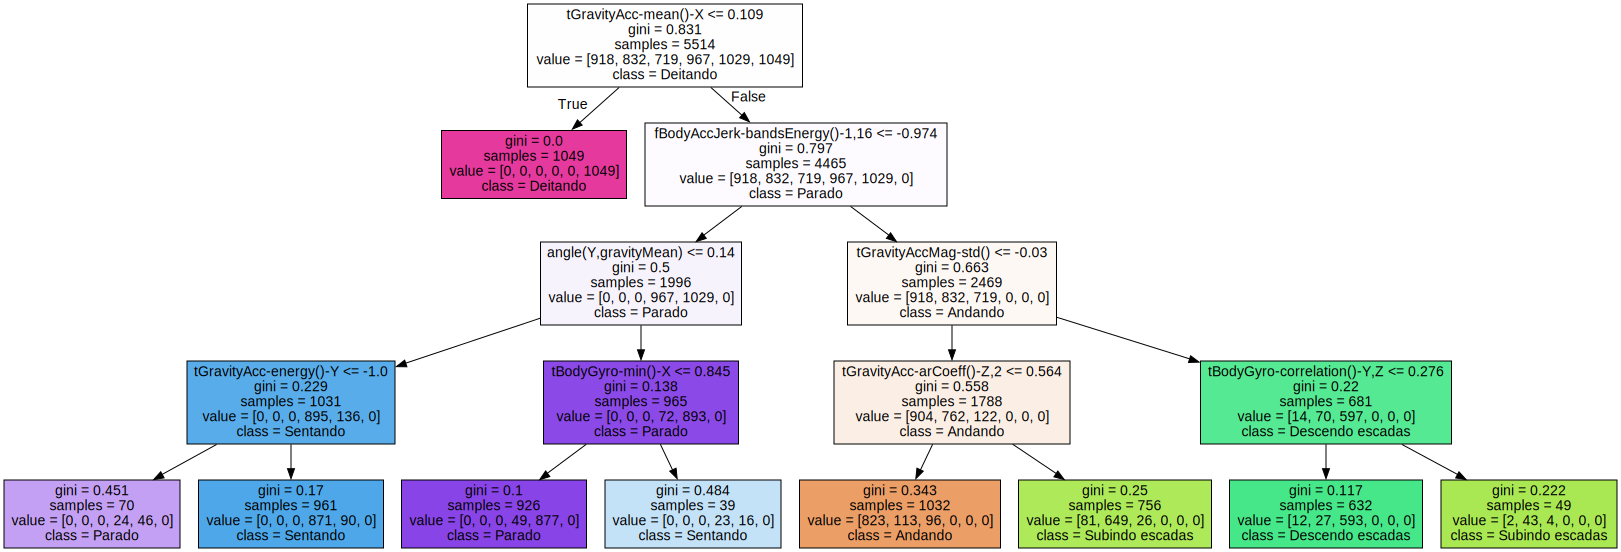

In [74]:
# Lista com os nomes das atividades na variável resposta
classes = ['Andando', 'Subindo escadas', 'Descendo escadas',
           'Sentando', 'Parado', 'Deitando']

# Ajusta os dados da árvore ao graphviz
dados_arvore = export_graphviz(arvore_inicial, out_file=None, 
                           feature_names=X_treino.columns,
                           class_names=classes,
                           filled=True)

# Monta o gráfico da árvore de classificação
arvore_grafica = graphviz.Source(dados_arvore, format="png")

# Visualização da árvore
arvore_grafica

#### 3.3 Verificação das variáveis mais importantes
Apesar de ser possível verificar algumas das medidas com maior importância a partir da árvore gerada acima, vamos confirmar quais são elas a partir de um novo dataframe, com este tendo duas colunas: 'Medida', onde estão os nomes das medidas tomadas, e 'Grau de importância', identificando o valor de importância de cada variável. 

In [75]:
# Lista com os nomes das medidas
medidas = X_treino.columns

# Array com os valores de importância de cada variável
importancia = arvore_inicial.feature_importances_

# Dicionário definindo as colunas do dataframe para classificação a partir das listas acima
dados = {'Medida': medidas, 'Grau de importância': importancia}

# Criação do dataframe de referência
classificacao_medida = pd.DataFrame(data=dados)

# Coloca as linhas em ordem decrescente de acordo com o grau de importância e mostra as 3 primeiras
classificacao_medida.sort_values(by=['Grau de importância'], ascending=False).head(3)

,Medida,Grau de importância
40,tGravityAcc-mean()-X,0.280288
389,"fBodyAccJerk-bandsEnergy()-1,16",0.253431
559,"angle(Y,gravityMean)",0.172169


A tabela resultante mostra que as 3 melhores variáveis são: 'tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16' e 'angle(Y,gravityMean)'. Vamos utilizá-las nas próximas seções desta atividade para o ajuste da melhor árvore de classificação.

Para facilitar a utilização das variáveis em questão, vamos filtra-las de cada uma das 3 bases criadas.

In [76]:
# Tomando as 3 colunas de maior importância da base de treino
X_treino_filtrado = X_treino[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 
                              'angle(Y,gravityMean)']]

# Tomando as 3 colunas de maior importância da base de validação
X_valid_filtrado = X_valid[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 
                              'angle(Y,gravityMean)']]

# Tomando as 3 colunas de maior importância da base de teste
X_teste_filtrado = X_test[['tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 
                              'angle(Y,gravityMean)']]

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

#### 4.1 Construindo uma nova árvore e obtenção dos ccp_alphas
Agora que foram separadas as 3 variáveis mais importantes da base de dados, vamos construir uma nova árvore com apenas essas variáveis. Com a árvore pronta, vamos calcular seu caminho custo complexidade (ccp_alphas).

In [90]:
# Criação de uma nova árvore
nova_arvore = DecisionTreeClassifier(random_state=2360873)

# Ajuste do caminho custo custo complexidade da árvore na base de treino
caminho = nova_arvore.cost_complexity_pruning_path(X_treino_filtrado, y_treino)

# Obtenção dos ccp_alphas e impurezas do ajuste
ccp_alphas, impurezas = caminho.ccp_alphas, caminho.impurities

Para evitar que ocorram erros na obtenção da árvore com melhor ajuste a partir dos ccp_alphas, vejamos se algum deles tem valor negaivo. Caso haja algum, vamos removê-lo do array.

In [91]:
# Visualização das componentes do array ccp_alpha
ccp_alphas

array([0.00000000e+00, 1.20904365e-04, 1.45085238e-04, 1.45085238e-04,
       1.51130456e-04, 1.51130456e-04, 1.51130456e-04, 1.51130456e-04,
       1.55448469e-04, 1.55448469e-04, 1.55448469e-04, 1.58686979e-04,
       1.58686979e-04, 1.58686979e-04, 1.61205820e-04, 1.61205820e-04,
       1.61205820e-04, 1.62266384e-04, 1.64869588e-04, 1.66243501e-04,
       1.66243501e-04, 1.66243501e-04, 1.67406043e-04, 1.67406043e-04,
       1.67406043e-04, 1.68402508e-04, 1.69266111e-04, 1.69266111e-04,
       1.70021763e-04, 1.70021763e-04, 1.70021763e-04, 1.70688515e-04,
       1.70688515e-04, 1.70688515e-04, 1.71281183e-04, 1.71281183e-04,
       1.71811466e-04, 1.71811466e-04, 1.72720521e-04, 1.72720521e-04,
       1.72720521e-04, 1.73471480e-04, 1.73471480e-04, 1.73800024e-04,
       1.74381295e-04, 1.74639638e-04, 1.75860894e-04, 1.76223815e-04,
       1.77234807e-04, 1.77578286e-04, 1.77729416e-04, 1.77729416e-04,
       1.78282707e-04, 1.78333938e-04, 1.78333938e-04, 1.78383489e-04,
      

Verifica-se que todos os valores estão ordenados em valores crescentes. Dado que o inicial tem valor 0, nenhum dos ccp_alphas são negativos.

#### 4.2 Ajustes das árvores para cada valor de ccp_alpha 
Façamos agora os ajustes de árvores na base de treino para cada valor de ccp_alpha.

In [79]:
%%time

# Lista onde são inseridas as árvores
arvores = []

# Realiza o ajuste da base de treino à árvore para cada ccp_alpha
for ccp_alpha in ccp_alphas:
    arvore = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha)
    ajuste = arvore.fit(X_treino_filtrado, y_treino)
    arvores.append(ajuste)

Wall time: 4.78 s


Com a lista de árvores ajustadas pronta, vamos verificar a acurácia de cada uma delas nas bases de treino e validação.

In [80]:
# Cálculos da acurácia de cada árvore na base de treino, salvando os resultados em uma lista
acuracia_treino = [arvore.score(X_treino_filtrado, y_treino) for arvore in arvores]

# Cálculos da acurácia de cada árvore na base de validação, salvando os resultados em uma lista
acuracia_valid  = [arvore.score(X_valid_filtrado, y_valid)   for arvore in arvores]

Tendo sido criadas as listas com os valores de acurácia tanto na base de treino quanto na de validação, vamos montar um gráfico de acurácia em função do ccp_alpha em ambas as bases para obter a árvore com o melhor ajuste. 

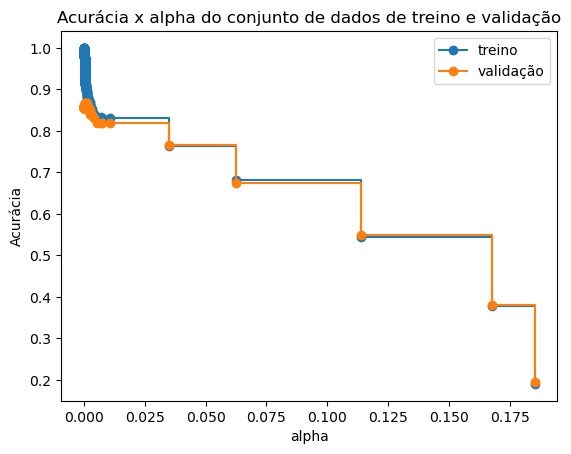

In [82]:
# Cria a figura em que é inserido o gráfico
fig, ax = plt.subplots()

# Define o nome do eixo x
ax.set_xlabel("alpha")

# Define o nome do eixo y
ax.set_ylabel("Acurácia")

# Título do gráfico
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")

# Gráfico da acurácia na base de treino em função do ccp_alpha
ax.plot(ccp_alphas, acuracia_treino, marker='o', label="treino",
        drawstyle="steps-post")

# Gráfico da acurácia na base de teste em função do ccp_alpha
ax.plot(ccp_alphas, acuracia_valid, marker='o', label="validação",
        drawstyle="steps-post")

# Insere os nomes em cada eixo
ax.legend()

# Mostra o gráfico
plt.show()

O gráfico mostra que a acurácia diminui com o aumento do ccp_alpha em ambas as bases utilizadas. Dessa forma, a árvore com melhor acurácia na base de validação deve estar na região em que ccp_alpha está entre 0 e 0.025. De qualquer forma, vamos pedir para o python obter o índice da árvore com melhor acurácia nesta base.

In [92]:
# Obtém o índice da árvore com melhor acurácia na lista de ajustes da base de validação
ind_melhor_arvore = len(acuracia_valid) - acuracia_valid[::-1].index(max(acuracia_valid)) - 1

# Seleciona a árvore com o índice obtido
melhor_arvore = arvores[ind_melhor_arvore]

# Imprime o valor da acurácia da melhor árvore na base de validação
print(f'Acurácia da melhor árvore na base de validação: {acuracia_valid[ind_melhor_arvore]*100:.2f}%')

# Mostra qual árvore foi selecionada
melhor_arvore

Acurácia da melhor árvore na base de validação: 86.78%


DecisionTreeClassifier(ccp_alpha=0.0010555770266582878, random_state=2360873)

Dado que a acurácia de um ajuste varia entre 0 e 100%, a melhor árvore apresentou um alto valor de acurácia, próximo a 87%. Além disso, verifica-se que o ccp_alpha está na região suspeitada, uma vez que o seu valor é de 0.00106.

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Para avaliar o modelo, vamos obter a acurácia da melhor árvore na base de teste e compará-la à obtida na base de validação. Além disso, vamos analisar a matriz de confusão do ajuste.

Acurácia do ajuste da base de teste na melhor árvore: 69.70%


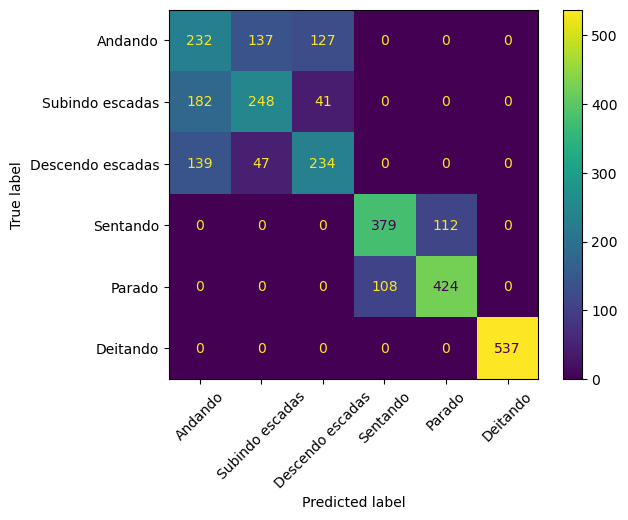

In [93]:
acuracia_teste = melhor_arvore.score(X_teste_filtrado, y_test)

print(f'Acurácia do ajuste da base de teste na melhor árvore: {acuracia_teste*100:.2f}%')

# Lista com os nomes das atividades na variável resposta
classes = ['Andando', 'Subindo escadas', 'Descendo escadas',
           'Sentando', 'Parado', 'Deitando']

# Predições da variável resposta a partir da base de teste
predicoes = melhor_arvore.predict(X_teste_filtrado)

# Comparação entre os valores verdadeiros e os preditos na base de teste
matriz = confusion_matrix(y_test, predicoes)

# Ajuste dos dados à matriz de confusão
display = ConfusionMatrixDisplay(confusion_matrix=matriz,
                              display_labels=classes)

# Montagem gráfica ad matriz de confusão
display.plot()

# Rotaciona os nomes no eixo x por 45 graus
plt.xticks(rotation=45)

# Visualização da matriz de confusão
plt.show()

Os resultados mostram que a acurácia do ajuste na base de teste foi inferior ao da base de validação, sendo uma diferença próxima a 17%. Por outro lado, comparando o resultado deste ajuste com o realizado na atividade anterior, onde foram utilizadas as 3 primeiras variáveis do conjunto de dados, este foi muito melhor, uma vez que o ajuste anterior teve uma acurácia de 45%. Curiosamente, os maiores erros encontram-se nos mesmos casos do que o anterior, onde a variável predita é 'Andando' com as variáveis verdadeiras sendo 'Subindo escadas' e 'Descendo escadas'.

Uma possibilidade de corrigir isso pode ser a utilização de mais variáveis no ajuste, de forma que não ocorra um overfitting.